In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore') 
from mlxtend.plotting import plot_decision_regions

In [18]:
df = pd.read_excel("Social_Network_Ads.xlsx")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


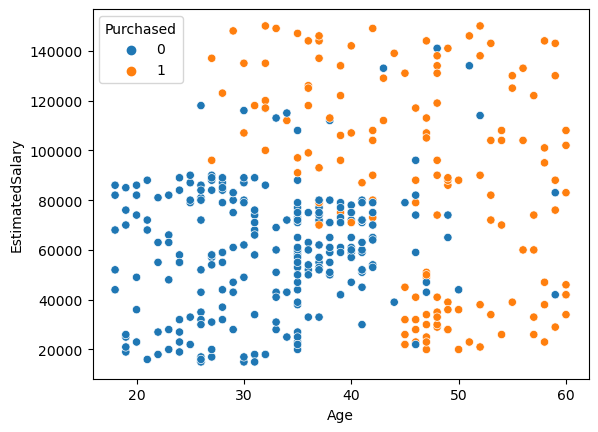

In [19]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=df,hue="Purchased")
plt.show()

In [20]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [21]:
x = df.iloc[:,:-1]
y = df["Purchased"]

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [26]:
knn.score(x_test,y_test)*100

90.0

In [27]:
knn.score(x_train,y_train)*100

90.9375

In [28]:
knn.predict([[1.083596,-0.990844]])

array([1], dtype=int64)

In [29]:
x,y

(          Age  EstimatedSalary
 0   -1.781797        -1.490046
 1   -0.253587        -1.460681
 2   -1.113206        -0.785290
 3   -1.017692        -0.374182
 4   -1.781797         0.183751
 ..        ...              ...
 395  0.797057        -0.844019
 396  1.274623        -1.372587
 397  1.179110        -1.460681
 398 -0.158074        -1.078938
 399  1.083596        -0.990844
 
 [400 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

In [30]:
for i in range(1,40):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train,y_train)
    print(i,knn1.score(x_train,y_train),knn1.score(x_test,y_test)*100)

1 0.996875 85.0
2 0.915625 86.25
3 0.925 91.25
4 0.91875 92.5
5 0.909375 92.5
6 0.909375 90.0
7 0.91875 93.75
8 0.90625 92.5
9 0.9125 93.75
10 0.90625 92.5
11 0.909375 92.5
12 0.9125 92.5
13 0.915625 92.5
14 0.90625 92.5
15 0.90625 92.5
16 0.9 92.5
17 0.90625 92.5
18 0.9 92.5
19 0.909375 92.5
20 0.9 93.75
21 0.903125 92.5
22 0.9 93.75
23 0.903125 93.75
24 0.89375 93.75
25 0.9 93.75
26 0.89375 93.75
27 0.89375 92.5
28 0.8875 93.75
29 0.8875 93.75
30 0.890625 93.75
31 0.8875 93.75
32 0.8875 93.75
33 0.890625 93.75
34 0.884375 93.75
35 0.8875 93.75
36 0.8875 93.75
37 0.890625 93.75
38 0.884375 93.75
39 0.884375 93.75


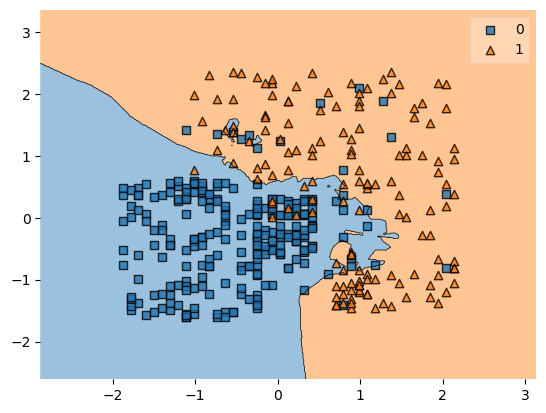

In [32]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=knn)
plt.show()